# Diabetes Study


In [107]:
%matplotlib notebook
%matplotlib ipympl
%matplotlib ipympl

In [108]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [109]:
path = Path("../data/diabetes_dataset00.csv")

In [110]:
#Read csv file into Pandas
original_data = pd.read_csv(path)
original_data.value_counts('Target')


Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

In [111]:
#Make lists to collect calculations for plots
yesfamily_smoke_count = []
yesfamily_nosmoke_count = []
nofamily_smoke_count = []
nofamily_nosmoke_count = []
yesfamily_low_count = []
yesfamily_moderate_count = []
yesfamily_high_count = []
nofamily_low_count = []
nofamily_moderate_count = []
nofamily_high_count = []

## Type 1 Diabetes

In [112]:
#Select Type 1 Data
type1_df = original_data[original_data['Target'] == 'Type 1 Diabetes']
type1_df.reset_index()
print(len(type1_df))
print(type1_df.value_counts('Family History'))
print(type1_df.value_counts('Smoking Status'))
print(type1_df.value_counts('Alcohol Consumption'))

5446
Family History
Yes    2729
No     2717
Name: count, dtype: int64
Smoking Status
Non-Smoker    2725
Smoker        2721
Name: count, dtype: int64
Alcohol Consumption
Low         1858
Moderate    1795
High        1793
Name: count, dtype: int64


## Type 1 Family History vs. Smoking

In [113]:
#Get the needed columns
family_smoking_type1_df = type1_df[['Family History', 'Smoking Status']]

#Count and Sort Categories
type1_fs = pd.DataFrame(family_smoking_type1_df.value_counts())
type1_fs = type1_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type1_fs_df = pd.DataFrame(type1_fs)
type1_yesfam_smoke = type1_fs_df[type1_fs_df['Family History'] == 'Yes']
type1_nofam_smoke = type1_fs_df[type1_fs_df['Family History'] == 'No']
#Collect the measurements into lists
yesfamily_smoke_count.extend(type1_yesfam_smoke[type1_yesfam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
yesfamily_nosmoke_count.extend(type1_yesfam_smoke[type1_yesfam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())
nofamily_smoke_count.extend(type1_nofam_smoke[type1_nofam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
nofamily_nosmoke_count.extend(type1_nofam_smoke[type1_nofam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())

print(type1_yesfam_smoke)
print(type1_nofam_smoke)

  Family History Smoking Status  count
0            Yes         Smoker   1377
3            Yes     Non-Smoker   1352
  Family History Smoking Status  count
1             No         Smoker   1344
2             No     Non-Smoker   1373


## Type 1 Family History vs. Alcohol Consumption

In [114]:
#Set the order of display
sorting = ['Low', 'Moderate', 'High']
#Get the needed columns and reset index
family_drinking_type1_df = type1_df[['Family History', 'Alcohol Consumption']]
family_drinking_type1_df.reset_index(drop=True)

#Make DataFrame and sort into counted categories
type1_fd = pd.DataFrame(family_drinking_type1_df.value_counts())
type1_fd = type1_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type1_yesfam_drink = type1_fd[type1_fd['Family History'] == 'Yes']
type1_nofam_drink = type1_fd[type1_fd['Family History'] == 'No']
#Collect the calculations into a list
yesfamily_low_count.extend(type1_yesfam_drink[type1_yesfam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
yesfamily_moderate_count.extend(type1_yesfam_drink[type1_yesfam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
yesfamily_high_count.extend(type1_yesfam_drink[type1_yesfam_drink['Alcohol Consumption'] == 'High']['count'].tolist())
nofamily_low_count.extend(type1_nofam_drink[type1_nofam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
nofamily_moderate_count.extend(type1_nofam_drink[type1_nofam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
nofamily_high_count.extend(type1_nofam_drink[type1_nofam_drink['Alcohol Consumption'] == 'High']['count'].tolist())


print(type1_yesfam_drink)
print(type1_nofam_drink)

  Family History Alcohol Consumption  count
0            Yes                High    905
2            Yes                 Low    941
5            Yes            Moderate    883
  Family History Alcohol Consumption  count
1             No                High    888
3             No                 Low    917
4             No            Moderate    912


## Type 2 Diabetes

In [115]:
#Select Type 2 Data and reset index
type2_df = original_data[original_data['Target'] == 'Type 2 Diabetes']
type2_df.reset_index()
print(len(type2_df))
print(type2_df.value_counts('Family History'))
print(type2_df.value_counts('Smoking Status'))
print(type2_df.value_counts('Alcohol Consumption'))

5397
Family History
Yes    2746
No     2651
Name: count, dtype: int64
Smoking Status
Smoker        2706
Non-Smoker    2691
Name: count, dtype: int64
Alcohol Consumption
Low         1861
Moderate    1786
High        1750
Name: count, dtype: int64


## Type 2 Smoking Status and Family History

In [116]:
#Get needed columns
family_smoking_type2_df = type2_df[['Family History', 'Smoking Status']]

#Count, Sort, and Seperate Categories
type2_fs = pd.DataFrame(family_smoking_type2_df.value_counts())
type2_fs = type2_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type2_yesfam_smoke = type2_fs[type2_fs['Family History'] == 'Yes']
type2_nofam_smoke = type2_fs[type2_fs['Family History'] == 'No']

yesfamily_smoke_count.extend(type2_yesfam_smoke[type2_yesfam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
yesfamily_nosmoke_count.extend(type2_yesfam_smoke[type2_yesfam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())
nofamily_smoke_count.extend(type2_nofam_smoke[type2_nofam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
nofamily_nosmoke_count.extend(type2_nofam_smoke[type2_nofam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())


print(yesfamily_smoke_count)
#print(type2_yesfam_smoke)
#print(type2_nofam_smoke)

[1377, 1359]


## Type 2 Family History vs. Alcohol Consumption

In [117]:
#Desired order of data display
sorting = ['Low', 'Moderate', 'High']

#Get the columns needed
family_drinking_type2_df = type2_df[['Family History', 'Alcohol Consumption']]

#Count values, make DataFrame and sort into categories
type2_fd = pd.DataFrame(family_drinking_type2_df.value_counts())
type2_fd = type2_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type2_yesfam_drink = type2_fd[type2_fd['Family History'] == 'Yes']
type2_nofam_drink = type2_fd[type2_fd['Family History'] == 'No']
#Count and add to list
yesfamily_low_count.extend(type2_yesfam_drink[type2_yesfam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
yesfamily_moderate_count.extend(type2_yesfam_drink[type2_yesfam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
yesfamily_high_count.extend(type2_yesfam_drink[type2_yesfam_drink['Alcohol Consumption'] == 'High']['count'].tolist())
nofamily_low_count.extend(type2_nofam_drink[type2_nofam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
nofamily_moderate_count.extend(type2_nofam_drink[type2_nofam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
nofamily_high_count.extend(type2_nofam_drink[type2_nofam_drink['Alcohol Consumption'] == 'High']['count'].tolist())

print(type2_yesfam_drink)
print(type2_nofam_drink)



  Family History Alcohol Consumption  count
0            Yes                High    915
3            Yes                 Low    922
4            Yes            Moderate    909
  Family History Alcohol Consumption  count
1             No                High    835
2             No                 Low    939
5             No            Moderate    877


## Type 3c (Pancreatogenic Diabetes)

In [118]:
#Select Type 3c Data
type3c_df = original_data[original_data['Target'] == 'Type 3c Diabetes (Pancreatogenic Diabetes)']
type3c_df.reset_index()
print(len(type3c_df))
print(type3c_df.value_counts('Family History'))
print(type3c_df.value_counts('Smoking Status'))
print(type3c_df.value_counts('Alcohol Consumption'))

5320
Family History
No     2662
Yes    2658
Name: count, dtype: int64
Smoking Status
Smoker        2704
Non-Smoker    2616
Name: count, dtype: int64
Alcohol Consumption
Low         1826
Moderate    1765
High        1729
Name: count, dtype: int64


## Type 3c (Pancreatogenic Diabetes) Family History vs. Smoking

In [119]:
#Get the needed columns
family_smoking_type3c_df = type3c_df[['Family History', 'Smoking Status']]

#Count and sort Categories
type3c_fs = pd.DataFrame(family_smoking_type3c_df.value_counts())
type3c_fs = type3c_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type3c_yesfam_smoke = type3c_fs[type3c_fs['Family History'] == 'Yes']
type3c_nofam_smoke = type3c_fs[type3c_fs['Family History'] == 'No']

yesfamily_smoke_count.extend(type3c_yesfam_smoke[type3c_yesfam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
yesfamily_nosmoke_count.extend(type3c_yesfam_smoke[type3c_yesfam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())
nofamily_smoke_count.extend(type3c_nofam_smoke[type3c_nofam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
nofamily_nosmoke_count.extend(type3c_nofam_smoke[type3c_nofam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())


print(type3c_yesfam_smoke)
print(type3c_nofam_smoke)

  Family History Smoking Status  count
1            Yes         Smoker   1348
2            Yes     Non-Smoker   1310
  Family History Smoking Status  count
0             No         Smoker   1356
3             No     Non-Smoker   1306


## Type 3c (Pancreatogenic Diabetes) Family History vs. Alcohol Consumption

In [120]:
#Select the needed columns
family_drinking_type3c_df = type3c_df[['Family History', 'Alcohol Consumption']]

#Count and sort Categories
type3c_fd = pd.DataFrame(family_drinking_type3c_df.value_counts())
type3c_fd = type3c_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type3c_yesfam_drink = type3c_fd[type3c_fd['Family History'] == 'Yes']
type3c_nofam_drink = type3c_fd[type3c_fd['Family History'] == 'No']
#Add calculations to lists
yesfamily_low_count.extend(type3c_yesfam_drink[type3c_yesfam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
yesfamily_moderate_count.extend(type3c_yesfam_drink[type3c_yesfam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
yesfamily_high_count.extend(type3c_yesfam_drink[type3c_yesfam_drink['Alcohol Consumption'] == 'High']['count'].tolist())
nofamily_low_count.extend(type3c_nofam_drink[type3c_nofam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
nofamily_moderate_count.extend(type3c_nofam_drink[type3c_nofam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
nofamily_high_count.extend(type3c_nofam_drink[type3c_nofam_drink['Alcohol Consumption'] == 'High']['count'].tolist())


print(type3c_yesfam_drink)
print(type3c_nofam_drink)

  Family History Alcohol Consumption  count
0            Yes                High    869
3            Yes                 Low    906
4            Yes            Moderate    883
  Family History Alcohol Consumption  count
1             No                High    860
2             No                 Low    920
5             No            Moderate    882


## Wolfram Syndrome

In [121]:
#Select the Wolfram Syndrome Data
wolfram_df = original_data[original_data['Target'] == 'Wolfram Syndrome']
wolfram_df.reset_index()
print(len(wolfram_df))
print(wolfram_df.value_counts('Family History'))
print(wolfram_df.value_counts('Smoking Status'))
print(wolfram_df.value_counts('Alcohol Consumption'))

5315
Family History
Yes    2703
No     2612
Name: count, dtype: int64
Smoking Status
Smoker        2659
Non-Smoker    2656
Name: count, dtype: int64
Alcohol Consumption
High        1813
Moderate    1778
Low         1724
Name: count, dtype: int64


## Wolfram Family History vs. Smoking Status

In [122]:
#Select the needed columns
family_smoking_wolfram_df = wolfram_df[['Family History', 'Smoking Status']]
#Make DataFrame and sort values
wolfram_fs = pd.DataFrame(family_smoking_wolfram_df.value_counts())
wolfram_fs = wolfram_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
wolfram_yesfam_smoke = wolfram_fs[wolfram_fs['Family History'] == 'Yes']
wolfram_nofam_smoke = wolfram_fs[wolfram_fs['Family History'] == 'No']

yesfamily_smoke_count.extend(wolfram_yesfam_smoke[wolfram_yesfam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
yesfamily_nosmoke_count.extend(wolfram_yesfam_smoke[wolfram_yesfam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())
nofamily_smoke_count.extend(wolfram_nofam_smoke[wolfram_nofam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
nofamily_nosmoke_count.extend(wolfram_nofam_smoke[wolfram_nofam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())


print(wolfram_yesfam_smoke)
print(wolfram_nofam_smoke)

  Family History Smoking Status  count
0            Yes         Smoker   1364
2            Yes     Non-Smoker   1339
  Family History Smoking Status  count
1             No         Smoker   1295
3             No     Non-Smoker   1317


## Wolfram Syndrome Family History vs. Alcohol Consumption

In [123]:
#Select the needed columns
family_drinking_wolfram_df = wolfram_df[['Family History', 'Alcohol Consumption']]
#Count and sort into categories
wolfram_fd = pd.DataFrame(family_drinking_wolfram_df.value_counts())
wolfram_fd = wolfram_fd.sort_values(by=['Alcohol Consumption']).reset_index()
wolfram_yesfam_drink = wolfram_fd[wolfram_fd['Family History'] == 'Yes']
wolfram_nofam_drink = wolfram_fd[wolfram_fd['Family History'] == 'No']
#Count and add to lists
yesfamily_low_count.extend(wolfram_yesfam_drink[wolfram_yesfam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
yesfamily_moderate_count.extend(wolfram_yesfam_drink[wolfram_yesfam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
yesfamily_high_count.extend(wolfram_yesfam_drink[wolfram_yesfam_drink['Alcohol Consumption'] == 'High']['count'].tolist())
nofamily_low_count.extend(wolfram_nofam_drink[wolfram_nofam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
nofamily_moderate_count.extend(wolfram_nofam_drink[wolfram_nofam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
nofamily_high_count.extend(wolfram_nofam_drink[wolfram_nofam_drink['Alcohol Consumption'] == 'High']['count'].tolist())



print(wolfram_yesfam_drink)
print(wolfram_nofam_drink)

  Family History Alcohol Consumption  count
0            Yes                High    929
2            Yes                 Low    865
4            Yes            Moderate    909
  Family History Alcohol Consumption  count
1             No                High    884
3             No                 Low    859
5             No            Moderate    869


## Gestational Diabetes

In [124]:
#Select Gestational Diabetes data
gestational_df = original_data[original_data['Target'] == 'Gestational Diabetes']
gestational_df.reset_index()
print(len(gestational_df))
print(gestational_df.value_counts('Family History'))
print(gestational_df.value_counts('Smoking Status'))
print(gestational_df.value_counts('Alcohol Consumption'))

5344
Family History
Yes    2673
No     2671
Name: count, dtype: int64
Smoking Status
Smoker        2694
Non-Smoker    2650
Name: count, dtype: int64
Alcohol Consumption
Low         1826
High        1782
Moderate    1736
Name: count, dtype: int64


## Gestational Family History vs Smoking Status

In [125]:
#Select the columns needed
family_smoking_gestational_df = gestational_df[['Family History', 'Smoking Status']]

#Count and Sort into categories
gestational_fs = pd.DataFrame(family_smoking_gestational_df.value_counts())
gestational_fs = gestational_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
gestational_yesfam_smoke = gestational_fs[gestational_fs['Family History'] == 'Yes']
gestational_nofam_smoke = gestational_fs[gestational_fs['Family History'] == 'No']

yesfamily_smoke_count.extend(gestational_yesfam_smoke[gestational_yesfam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
yesfamily_nosmoke_count.extend(gestational_yesfam_smoke[gestational_yesfam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())
nofamily_smoke_count.extend(gestational_nofam_smoke[gestational_nofam_smoke['Smoking Status'] == 'Smoker']['count'].tolist())
nofamily_nosmoke_count.extend(gestational_nofam_smoke[gestational_nofam_smoke['Smoking Status'] == 'Non-Smoker']['count'].tolist())


print(gestational_yesfam_smoke)
print(gestational_nofam_smoke)

  Family History Smoking Status  count
1            Yes         Smoker   1311
2            Yes     Non-Smoker   1362
  Family History Smoking Status  count
0             No         Smoker   1383
3             No     Non-Smoker   1288


## Gestational Family History vs. Alcohol Consumption

In [ ]:
#Select the needed columns
family_drinking_gestational_df = gestational_df[['Family History', 'Alcohol Consumption']]

#Count and sort into categories
gestational_fd = pd.DataFrame(family_drinking_gestational_df.value_counts())
gestational_fd = gestational_fd.sort_values(by=['Alcohol Consumption']).reset_index()
gestational_yesfam_drink = gestational_fd[gestational_fd['Family History'] == 'Yes']
gestational_nofam_drink = gestational_fd[gestational_fd['Family History'] == 'No']

yesfamily_low_count.extend(gestational_yesfam_drink[gestational_yesfam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
yesfamily_moderate_count.extend(gestational_yesfam_drink[gestational_yesfam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
yesfamily_high_count.extend(gestational_yesfam_drink[gestational_yesfam_drink['Alcohol Consumption'] == 'High']['count'].tolist())
nofamily_low_count.extend(gestational_nofam_drink[gestational_nofam_drink['Alcohol Consumption'] == 'Low']['count'].tolist())
nofamily_moderate_count.extend(gestational_nofam_drink[gestational_nofam_drink['Alcohol Consumption'] == 'Moderate']['count'].tolist())
nofamily_high_count.extend(gestational_nofam_drink[gestational_nofam_drink['Alcohol Consumption'] == 'High']['count'].tolist())

print(gestational_yesfam_drink)
print(gestational_nofam_drink)

  Family History Alcohol Consumption  count
0            Yes                High    897
2            Yes                 Low    922
5            Yes            Moderate    854
  Family History Alcohol Consumption  count
1             No                High    885
3             No                 Low    904
4             No            Moderate    882


In [127]:
print(yesfamily_smoke_count)
print(yesfamily_nosmoke_count)
print(nofamily_smoke_count)
print(nofamily_nosmoke_count)
print(yesfamily_low_count)
print(yesfamily_moderate_count)
print(yesfamily_high_count)
print(nofamily_low_count)
print(nofamily_moderate_count)
print(nofamily_high_count)


[1377, 1359, 1348, 1364, 1311]
[1352, 1387, 1310, 1339, 1362]
[1344, 1347, 1356, 1295, 1383]
[1373, 1304, 1306, 1317, 1288]
[941, 922, 906, 865, 922]
[883, 909, 883, 909, 854]
[905, 915, 869, 929, 897]
[917, 939, 920, 859, 904]
[912, 877, 882, 869, 882]
[888, 835, 860, 884, 885]


## Smoking Status with Family History as yes

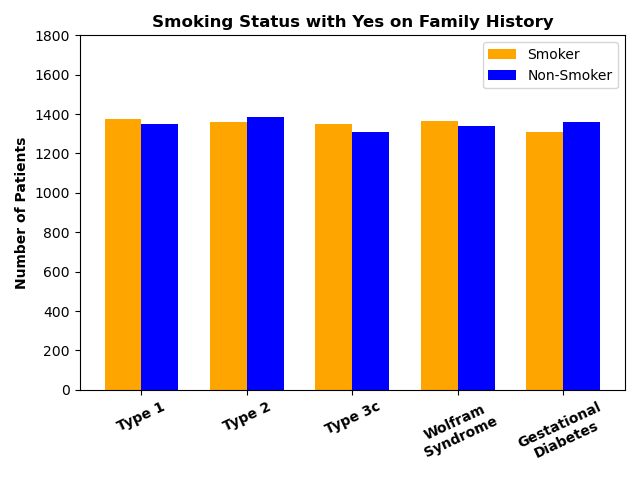

In [128]:
categories = ['Type 1', 'Type 2', 'Type 3c', f'Wolfram\n' 'Syndrome', f'Gestational\n' 'Diabetes']
indx = np.arange(len(categories))
count = np.arange(0, 2000, 200)
bar_width = 0.35

fig, ax = plt.subplots()
yesbarsmoke = ax.bar(indx - bar_width/2, yesfamily_smoke_count, bar_width, label='Smoker', color= 'orange')
yesbar_nosmoke = ax.bar(indx + bar_width/2, yesfamily_nosmoke_count, bar_width, label='Non-Smoker', color = 'b')

ax.set_xticks(indx)
ax.set_xticklabels(categories, rotation=25, weight='bold')
ax.set_title(f'Smoking Status with Yes on Family History', weight='bold')
ax.set_yticks(count)
ax.legend()
plt.ylabel('Number of Patients', weight='bold')
plt.tight_layout()
plt.show()

## Smoking No Family History

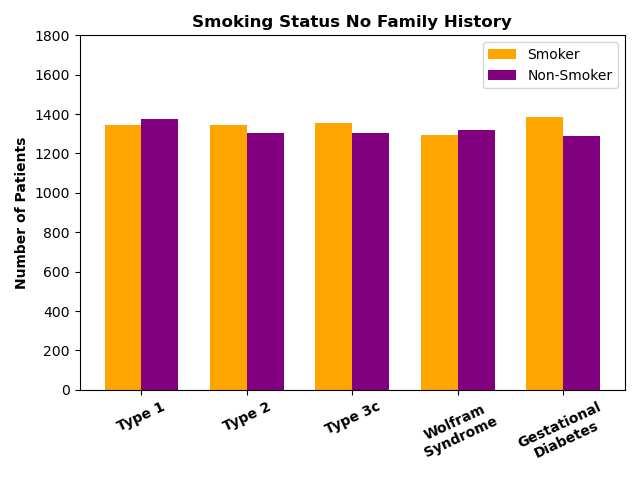

In [129]:
categories = ['Type 1', 'Type 2', 'Type 3c', f'Wolfram\n' 'Syndrome', f'Gestational\n' 'Diabetes']
indx = np.arange(len(categories))
count = np.arange(0, 2000, 200)
bar_width = 0.35

fig, ax = plt.subplots()
nobarsmoke = ax.bar(indx - bar_width/2, nofamily_smoke_count, bar_width, label='Smoker', color= 'orange')
nobar_nosmoke = ax.bar(indx + bar_width/2, nofamily_nosmoke_count, bar_width, label='Non-Smoker', color = 'purple')
ax.set_xticks(indx)
ax.set_xticklabels(categories, rotation=25, weight='bold')
ax.set_title(f'Smoking Status No Family History', weight='bold')
ax.set_yticks(count)
ax.legend()
plt.ylabel('Number of Patients', weight='bold')
plt.tight_layout()
plt.show()

## Yes Family History Alcohol Consumption

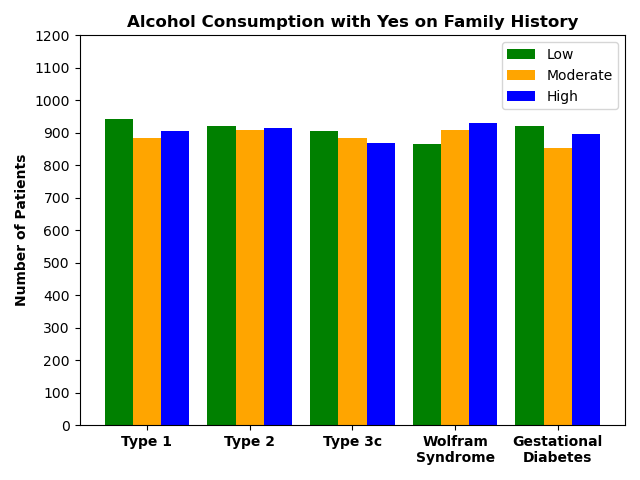

In [130]:
categories = ['Type 1', 'Type 2', 'Type 3c', f'Wolfram\n' 'Syndrome', f'Gestational\n' 'Diabetes']
indx = np.arange(len(categories))
count = np.arange(0, 1300, 100)
al_bar_width = 0.275

fig, ax = plt.subplots()
yesbar_low = ax.bar(indx - al_bar_width, yesfamily_low_count, al_bar_width, label='Low', color='g')
yesbar_moderate = ax.bar(indx, yesfamily_moderate_count, al_bar_width, label='Moderate', color='orange')
yesbar_high = ax.bar(indx + al_bar_width, yesfamily_high_count, al_bar_width, label='High', color='b')
ax.set_xticks(indx)
ax.set_xticklabels(categories, weight='bold')
ax.set_title(f'Alcohol Consumption with Yes on Family History', weight='bold')
ax.set_yticks(count)
ax.legend()
#plt.subplots_adjust(wspace=0.5)
plt.ylabel('Number of Patients', weight='bold')
plt.tight_layout()
plt.show()

## No Family History Alcohol Consumption

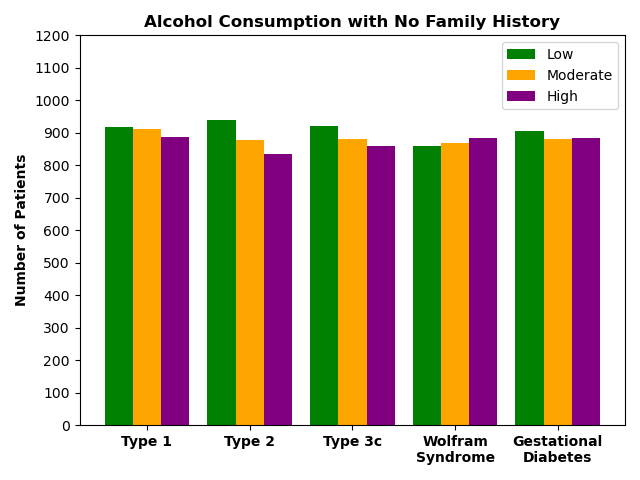

In [132]:
#Set Variables
categories = ['Type 1', 'Type 2', 'Type 3c', f'Wolfram\n' 'Syndrome', f'Gestational\n' 'Diabetes']
indx = np.arange(len(categories))
count = np.arange(0, 1300, 100)
al_bar_width = 0.275
#Plot
fig, ax = plt.subplots()
nobar_low = ax.bar(indx - al_bar_width, nofamily_low_count, al_bar_width, label='Low', color='g')
nobar_moderate = ax.bar(indx, nofamily_moderate_count, al_bar_width, label='Moderate', color='orange')
nobar_high = ax.bar(indx + al_bar_width, nofamily_high_count, al_bar_width, label='High', color='purple')
ax.set_xticks(indx)
ax.set_xticklabels(categories, weight='bold')
ax.set_title(f'Alcohol Consumption with No Family History', weight='bold')
ax.set_yticks(count)
ax.legend()
plt.ylabel('Number of Patients', weight='bold')
plt.tight_layout()
plt.show()